In [2]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from ipywidgets import widgets
from ipywidgets import interact, interact_manual, interactive

In [16]:
x_bounds = np.array([0, 10])
y_bounds = np.array([0, 10])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

/tmp/ipykernel_13209/1570622781.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)


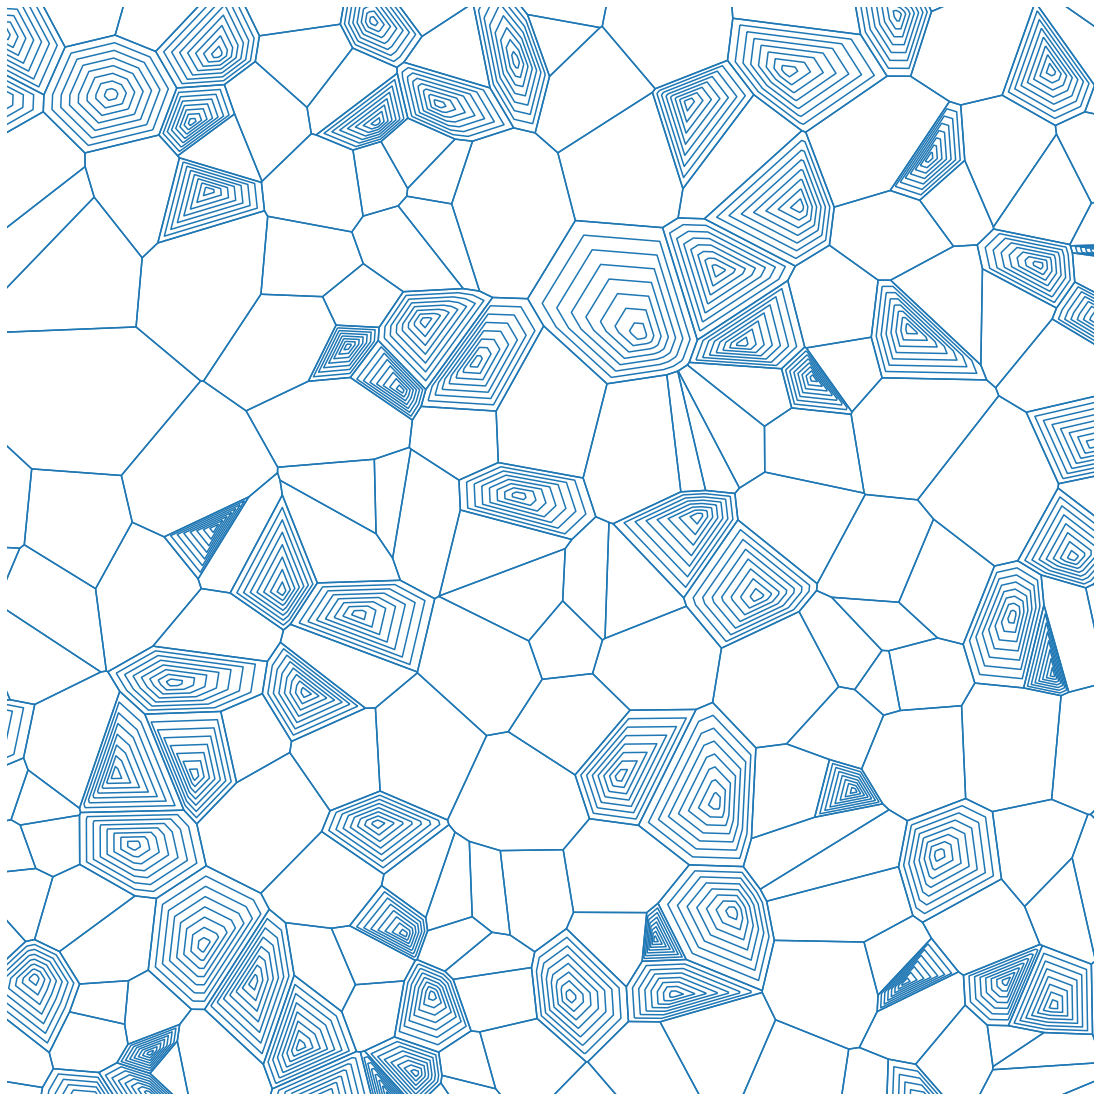

interactive(children=(IntSlider(value=300, description='num_points', max=1000, min=10, step=25), FloatSlider(v…

In [24]:
def make_some_art(num_points=300, percent_to_fill = 0.3, n_fill_lines = 7, min_scalar = 0.1,  debug=False, toggle_for_new=False):
    
    x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions
    
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    
    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)
    
    fill = []
    
    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    # dimensions of the plot
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_aspect('equal')
    
    if not debug:
        plt.grid(False)
        plt.axis('off')

    
    ax.set_xlim(*x_plot)
    ax.set_ylim(*y_plot)
    lc = LineCollection(shapes+fill)
    ax.add_collection(lc)
    
    return fig, ax
    
w = interactive(make_some_art,
                num_points=(10,1000,25),
                percent_to_fill=(0., 1., 0.05),
                n_fill_lines=(1, 20, 1),
                min_scalar=(0,1,0.01))
display(w)

In [6]:
fig, ax = w.result

In [8]:
fig.savefig('GenerativeArt.jpg', bbox_inches = 'tight', pad_inches = 0)